#             Adult Census Income

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


In [3]:
#loading the dataset
df = pd.read_csv("adult.csv")
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
#Listing all the categorical and numerical attributes
cat_col = df.dtypes[df.dtypes == 'object']
num_col = df.dtypes[df.dtypes != 'object']
print(cat_col)
print(num_col)


workclass         object
education         object
marital.status    object
occupation        object
relationship      object
race              object
sex               object
native.country    object
income            object
dtype: object
age               int64
fnlwgt            int64
education.num     int64
capital.gain      int64
capital.loss      int64
hours.per.week    int64
dtype: object


# Data Cleaning

In [5]:
#Replacing the Missing values with 'NAN'
for col in df:
    df.loc[df[col] == '?', col] = 'NAN'
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NAN,77053,HS-grad,9,Widowed,NAN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NAN,186061,Some-college,10,Widowed,NAN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


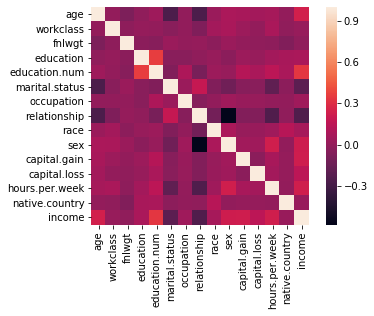

In [104]:
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# correlation 
encoded_data, _ = number_encode_features(df)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()


We see there is a high correlation between education and education.num

In [6]:
df[["education", "education.num"]].head(20)

,education,education.num
0,HS-grad,9
1,HS-grad,9
2,Some-college,10
3,7th-8th,4
4,Some-college,10
5,HS-grad,9
6,10th,6
7,Doctorate,16
8,HS-grad,9
9,Some-college,10


As we can see these two columns actually represent the same features, but encoded as strings and as numbers. We don’t need the string representation, so we can just **delete** this column.

In [7]:
#Deleting Irrelevant columns
adult=df.drop(['education'],axis=1)
adult.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NAN,77053,9,Widowed,NAN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NAN,186061,10,Widowed,NAN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [8]:
#grouping similar rows
separated = ['Separated','Divorced']

df['marital.status'].replace(to_replace = separated,value = 'Separated')
df['marital.status'].value_counts()


Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [9]:
#Renaming to avoid confusion
adult=adult.rename(columns={"education.num" : "education_num","marital.status": "marital_status", "capital.gain": "capital_gain","capital.loss": "capital_loss","hours.per.week": "hours_per_week","native.country": "country"})

In [10]:
adult.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
0,90,NAN,77053,9,Widowed,NAN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NAN,186061,10,Widowed,NAN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Data Visualization

Text(0, 0.5, 'Final Weight')

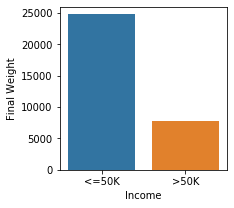

In [11]:
plt.figure(figsize =(3,3));
sns.countplot(adult.income)
plt.xlabel("Income",fontsize = 10)
plt.ylabel("Final Weight",fontsize = 10)

This dataset contain 75% of people earning less than 50K and remainng 25% above 50K.


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'age'),
 Text(0.5, 1.0, 'Frequency Histogram of age vs income')]

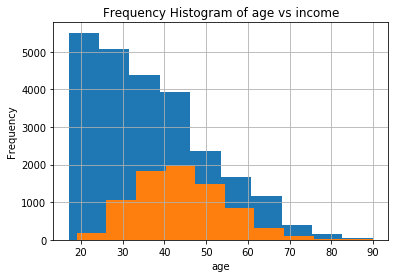

In [12]:
#Histogram representation for age vs income
adult.groupby("income").age.hist()
plt.gca().set(title='Frequency Histogram of age vs income', xlabel='age', ylabel='Frequency')


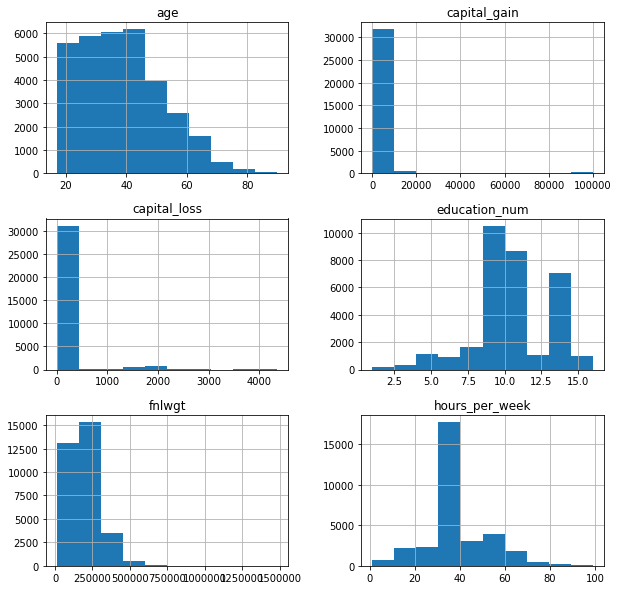

In [13]:
adult.hist(figsize =(10,10))
plt.show()


# Feature analysis:

In [14]:
adult['income_val'] = np.where(adult['income']=='>50K',1,0)
adult1=adult.drop(['income'],axis=1)
adult1.head()


,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income_val
0,90,NAN,77053,9,Widowed,NAN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NAN,186061,10,Widowed,NAN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [114]:
#Co-variance of the varaiables
adult.cov()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_val
age,186.061400,-1.103507e+05,1.281849,7.824819e+03,317.560742,11.580130,1.364997
fnlwgt,-110350.685300,1.114080e+10,-11729.527298,3.366625e+05,-436030.333167,-24460.426185,-427.056721
education_num,1.281849,-1.172953e+04,6.618890,2.330008e+03,82.856445,4.705338,0.368685
capital_gain,7824.818537,3.366625e+05,2330.007877,5.454254e+07,-94085.760688,7150.032029,705.230910
capital_loss,317.560742,-4.360303e+05,82.856445,-9.408576e+04,162376.937814,269.953755,25.935432
hours_per_week,11.580130,-2.446043e+04,4.705338,7.150032e+03,269.953755,152.458995,1.212651
income_val,1.364997,-4.270567e+02,0.368685,7.052309e+02,25.935432,1.212651,0.182826


Except the fnlwgt, the rest of the features are directly proportional to income. 
As the income class increases, the frequency of population falling under the paticular income class decreases.


In [15]:
#Co-relation of the varaiables
adult.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_val
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
income_val,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


education_num feature has the highest correlation with income, followed by age,hours_per_week and capital_gain in order.
fnlwgt has negative and least correlation.

In [16]:
adult.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_val
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


# Building Model

In [68]:
# convert selected features do dummies...
model_data = pd.get_dummies(adult)

# set x and y
X = model_data.drop(columns=['income_val'])
y = model_data.income_val

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

## Logistic regression:

In [69]:
# set the model
model1 = LogisticRegression(solver = 'liblinear')
# fit model
model1.fit(X, y)
y_pred = model1.predict(X_test)
#Classification/Accuracy Error
print("Score accuracy: ",accuracy_score(y_test, y_pred))
#confusion matrix
print("confusion matrix:\n",confusion_matrix(y_test, y_pred))

Score accuracy:  0.810379241516966
confusion matrix:
 [[4838  139]
 [1096  440]]


In [70]:
# Get probability predictions.
y_pred_proba = model1.predict_proba(X_test)[:,1]
#Classification/Accuracy Error
accuracy1=accuracy_score(y_test, y_pred_proba.round())
print("Score accuracy: ",accuracy1)
#confusion matrix with new threshold
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_proba > .7)
print("confusion matrix:\n",conf_mat)

Score accuracy:  0.810379241516966
confusion matrix:
 [[4961   16]
 [1252  284]]


In [71]:
print("Sensitivity =" ,conf_mat[1][0]/(conf_mat[1][0]+conf_mat[1][1]))
print("specificity =", conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1]))

Sensitivity = 0.8151041666666666
specificity = 0.9967852119750854


In [72]:
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train_std = sc.fit_transform(X_train)

# Apply the scaler to the test data
X_test_std = sc.transform(X_test)

C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train_std, y_train))
    print('Test accuracy:', clf.score(X_test_std, y_test))
    print('')

C: 10
Coefficient of each feature: [[-1.77169083e-02 -1.37300277e-06 -3.46568418e-02  9.53915096e-05
   3.68741021e-04  3.19406839e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -8.22092800e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  4.55537624e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.45048574e-01  0.00000000e+00 -1.06391950e+00
  -1.02839948e+00 -1.14926596e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.0000

From the above analysis, Regularization has no impact on the model.

## Naive Bayes Algorithm

In [73]:
#Create a model with respect to the classifier
model2 = GaussianNB()

# fit the model with the training data
model2.fit(X_train,y_train)

# predict the target on the train dataset
predict_train = model2.predict(X_train)
print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model2.predict(X_test)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy2 = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy2)

conf_mat = confusion_matrix(y_true=y_test, y_pred=predict_test > .7)
print("confusion matrix:\n",conf_mat)

Target on train data [0 0 0 ... 1 0 0]
accuracy_score on train dataset :  0.7921529484029484
Target on test data [0 0 1 ... 0 0 0]
accuracy_score on test dataset :  0.8109933978197451
confusion matrix:
 [[4766  211]
 [1020  516]]


## K-nearest Neighbours Classifier

In [74]:
#Create a model with respect to the classifier
model3 =  KNeighborsClassifier()

# fit the model with the training data
model3.fit(X_train, y_train)

# predict the target on the test dataset
y_pred = model3.predict(X_test)

# Accuracy Score on test dataset
accuracy3 = accuracy_score(y_test, y_pred)
print("Accuracy: ", (accuracy3 * 100.0))

#confusion matrix on test dataset
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred > .7)
print("confusion matrix:\n",conf_mat)

Accuracy:  78.44311377245509
confusion matrix:
 [[4583  394]
 [1010  526]]


In [79]:
pd.DataFrame([accuracy1*100, accuracy2*100, accuracy3*100],
             index = ['LogisticRegression','Navie Bayes','KNN'],
             columns = ['Accuracy %']).sort_values(by = 'Accuracy %',ascending  = False)

,Accuracy %
Navie Bayes,81.099340
LogisticRegression,81.037924
KNN,78.443114


Among 3 models, Logistic Regression model has highest accuracy of 80.85% followed by Navie Bayes model.

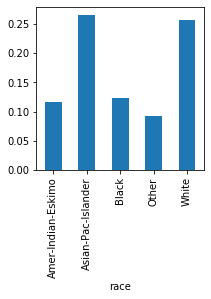

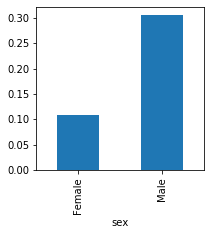

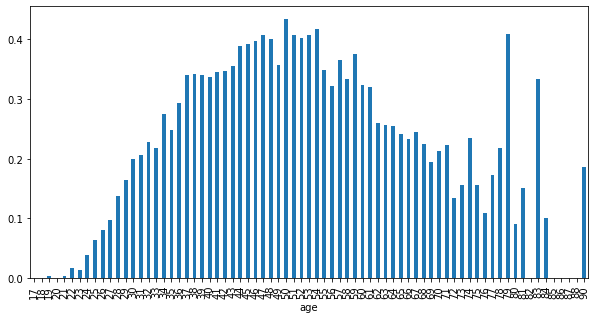

In [91]:
adult.groupby('race').income_val.mean().plot(kind='bar',figsize =(3,3))
plt.show()
adult.groupby('sex').income_val.mean().plot(kind='bar',figsize =(3,3))
plt.show()
adult.groupby('age').income_val.mean().plot(kind='bar',figsize =(10,5))
plt.show()

Men have more chances to have a higher income
White and Asian Pacific Islanders have more chances than other races
Income sort of follows the normal deviation, with a peak at 50 years old